In [28]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df = pd.read_csv("data/data_understanding_output.csv", skipinitialspace=True)

In [30]:
df.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,log_freq,number_of_meanings,avg_variance_between_meanings,PoS,sentiment
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,5.204321,0,0.0,NOUN,1.0
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,6.625813,0,0.0,NOUN,1.0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,5.146454,0,0.0,VERB,1.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,5.093852,0,0.0,VERB,1.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,5.107695,0,0.0,NOUN,1.0


## Feature preprocessing (light)

In [31]:
#remove useless variables
df= df.drop(['word','PoS', 'length', 'number_of_meanings', 'avg_variance_between_meanings', 'polysemy'], axis=1)

In [32]:
df.head()

,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,log_freq,sentiment
0,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,5.204321,1.0
1,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,6.625813,1.0
2,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,5.146454,1.0
3,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,5.093852,1.0
4,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,5.107695,1.0


## Pattern mining preprocessing


In [33]:
#discreting continous variables
df['arousalBin'] = pd.qcut(df['arousal'], 3, labels = ["Very Unarousing", "Moderate Arousal", "Very Arousing"])
df['dominanceBin'] = pd.qcut(df['dominance'], 3, labels = ["Controlled", "nor Cont. nor Dom.", "Dominant"])
df['concretenessBin'] = pd.qcut(df['concreteness'], 3, labels = ["Abstract", "nor Abs. nor Concr.", "Concrete"])
df['imageabilityBin'] = pd.qcut(df['imageability'], 3, labels = ["Hard to Imagine", "Moderately Imageable", "Easy to Imagine"])
df['familiarityBin'] = pd.qcut(df['familiarity'], 3, labels = ["Unfamiliar", "Moderately Familiar", "Familiar"])
df['aoaBin'] = round(df['aoa'])
df['semsizeBin'] = pd.qcut(df['semsize'], 3, labels = ["Very Small", "nor Small nor Big", "Very Big"])
df['genderBin'] = pd.qcut(df['gender'], 3, labels = ["Very Feminine", "Neuter", "Very Masculine"])
df['log_freqBin'] = pd.qcut(df['log_freq'], 5, labels = ["Very Uncommon", "Uncommon", "Moderately Common", "Common", "Very Common"])

df.drop(['arousal', 'valence', 'dominance','concreteness','imageability','familiarity','aoa','semsize','gender','log_freq'], axis=1, inplace=True)

In [34]:
df.head()

,sentiment,arousalBin,dominanceBin,concretenessBin,imageabilityBin,familiarityBin,aoaBin,semsizeBin,genderBin,log_freqBin
0,1.0,Moderate Arousal,Controlled,nor Abs. nor Concr.,Moderately Imageable,Unfamiliar,7.0,Very Big,Very Masculine,Very Uncommon
1,1.0,Very Unarousing,Controlled,Concrete,Moderately Imageable,Unfamiliar,5.0,Very Big,Very Feminine,Moderately Common
2,1.0,Very Unarousing,nor Cont. nor Dom.,Abstract,Hard to Imagine,Moderately Familiar,6.0,Very Small,Neuter,Very Uncommon
3,1.0,Moderate Arousal,Controlled,Abstract,Hard to Imagine,Unfamiliar,6.0,Very Big,Very Masculine,Very Uncommon
4,1.0,Very Unarousing,nor Cont. nor Dom.,Abstract,Hard to Imagine,Unfamiliar,6.0,Very Big,Very Masculine,Very Uncommon


In [35]:
aoa = {1.0: "0-2", 2.0:"3-4", 3.0:"5-6", 4.0:"7-8", 5.0:"9-10", 6.0:"11-12", 7.0:"13+"}
df['aoaBin'] = df['aoaBin'].map(aoa)

In [36]:
#key = value of the variable and the value is the name we want to apply at this value to make a sort of legend
surv_dict = {0.0: 'Negative', 1.0: 'Neutral',2.0: 'Positive'}
df['sentiment'] = df['sentiment'].map(surv_dict)


In [37]:
df.head()

,sentiment,arousalBin,dominanceBin,concretenessBin,imageabilityBin,familiarityBin,aoaBin,semsizeBin,genderBin,log_freqBin
0,Neutral,Moderate Arousal,Controlled,nor Abs. nor Concr.,Moderately Imageable,Unfamiliar,13+,Very Big,Very Masculine,Very Uncommon
1,Neutral,Very Unarousing,Controlled,Concrete,Moderately Imageable,Unfamiliar,9-10,Very Big,Very Feminine,Moderately Common
2,Neutral,Very Unarousing,nor Cont. nor Dom.,Abstract,Hard to Imagine,Moderately Familiar,11-12,Very Small,Neuter,Very Uncommon
3,Neutral,Moderate Arousal,Controlled,Abstract,Hard to Imagine,Unfamiliar,11-12,Very Big,Very Masculine,Very Uncommon
4,Neutral,Very Unarousing,nor Cont. nor Dom.,Abstract,Hard to Imagine,Unfamiliar,11-12,Very Big,Very Masculine,Very Uncommon


In [38]:
#we work on the list
X = df.values.tolist()

In [39]:
X[0]

['Neutral',
 'Moderate Arousal',
 'Controlled',
 'nor Abs. nor Concr.',
 'Moderately Imageable',
 'Unfamiliar',
 '13+',
 'Very Big',
 'Very Masculine',
 'Very Uncommon']

In [40]:
#!pip install pyfim

In [41]:
from fim import apriori

In [42]:
itemsets = apriori(X, target='s', supp=10, zmin=3, report='S')

In [43]:
itemsets[:5]

[(('11-12', 'Unfamiliar', 'Neutral'), 10.956856044425459),
 (('Very Common', 'Familiar', 'Neutral'), 11.362665527552327),
 (('Very Uncommon', 'Unfamiliar', 'Neutral'), 11.939342161469458),
 (('5-6', 'Concrete', 'Easy to Imagine'), 10.12387868432294),
 (('5-6', 'Concrete', 'Easy to Imagine', 'Neutral'), 10.059803502776592)]

In [44]:
# frequent itemset
itemsets[0][0]

('11-12', 'Unfamiliar', 'Neutral')

In [45]:
itemsets = apriori(X, target='m', supp=10, zmin=3, report='S')

In [46]:
# support
itemsets[0][1]

10.956856044425459

## Qui si conclude la prima parte di pattern mining, adesso ci sarebbe da analizzare la semantica dei primi 5 itemset.

In [47]:
itemsets[:5]

[(('11-12', 'Unfamiliar', 'Neutral'), 10.956856044425459),
 (('Very Common', 'Familiar', 'Neutral'), 11.362665527552327),
 (('Very Uncommon', 'Unfamiliar', 'Neutral'), 11.939342161469458),
 (('5-6', 'Concrete', 'Easy to Imagine', 'Neutral'), 10.059803502776592),
 (('9-10', 'Unfamiliar', 'Neutral'), 10.700555318240069)]

In [48]:
itemsets[0][0]

('11-12', 'Unfamiliar', 'Neutral')

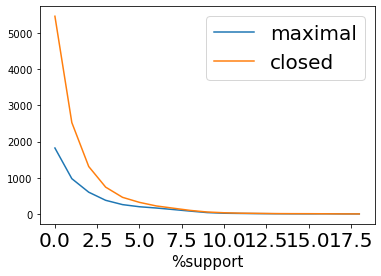

In [49]:
len_max_it = []
len_cl_it = []
for i in range(2, 20+1):
    max_itemsets = apriori(X, target='m', supp=i, zmin=3)
    cl_itemsets = apriori(X, target='c', supp=i, zmin=3)
    len_max_it.append( len(max_itemsets)  )
    len_cl_it.append( len(cl_itemsets) )
    
plt.plot(len_max_it, label='maximal')
plt.plot(len_cl_it, label='closed')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('%support', fontsize=15)

plt.show()

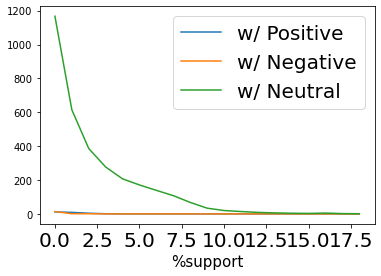

In [50]:
#papu da quello che ho capito qui mi sa fa schifo, 
#perché la lunghezza degli itemset più frequenti
#come si vede sopra scende a 0 quando la percentuale di support supera il 50%, da quello che ho capito è poco  
filter_1 = []
filter_2 = []
filter_3 = []
for i in range(2, 20+1):
    max_itemsets = apriori(X, target='m', supp=i, zmin=3)
    
    filter_1.append( len([item for item in max_itemsets if 'Positive' in item[0]])  )
    filter_2.append( len([item for item in max_itemsets if 'Negative' in item[0]]) )
    filter_3.append( len([item for item in max_itemsets if 'Neutral' in item[0]]) )
    #filtrare per qualcosa di interessante, (esempio lunghezza item set sopravvissuti e non sopravvissuti)
plt.plot(filter_1, label='w/ Positive')
plt.plot(filter_2, label='w/ Negative')
plt.plot(filter_3, label='w/ Neutral')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('%support', fontsize=15)

plt.show()
# qui sotto si vedrà invece che la lunghezza degli itemsets frequenti è 0 per target positive e negative 
# indipendentemente dalla percentuale di support, questa cosa non mi pare corretta
# avrò sicuramente sbagliato qualcosa nei valori

In [51]:
rules = apriori(X, target='r', supp=10, zmin=3, conf=60, report='aScl', eval='l', thresh=116.4, agg='m')

In [52]:
print(len(rules))

194


In [53]:
rules[:5]

[('11-12',
  ('Hard to Imagine', 'Unfamiliar', 'Neutral'),
  304,
  6.492951730029901,
  0.6055776892430279,
  3.826335682909388),
 ('Hard to Imagine',
  ('11-12', 'Unfamiliar'),
  350,
  7.4754378470739,
  0.6129597197898424,
  1.8291124334327864),
 ('Unfamiliar',
  ('11-12', 'Neutral'),
  513,
  10.956856044425459,
  0.7868098159509203,
  2.3125194967245504),
 ('Familiar',
  ('Very Common', 'Neutral'),
  532,
  11.362665527552327,
  0.6495726495726496,
  1.969753332447633),
 ('Unfamiliar',
  ('Very Uncommon', 'Neutral'),
  559,
  11.939342161469458,
  0.706700379266751,
  2.077069162414895)]

In [54]:
rules[0][0], rules[0][1]

('11-12', ('Hard to Imagine', 'Unfamiliar', 'Neutral'))

In [55]:
# asbolute support
rules[0][2]

304

In [56]:
# support as percentage
rules[0][3]

6.492951730029901

In [57]:
# confidence
rules[0][4]

0.6055776892430279

In [58]:
# lift
rules[0][5]

3.826335682909388

In [59]:
#find all the rules dove è implicata la variabile target
for r in rules:
    if r[0] == 'Neutral':
        print(r)


('Neutral', ('5-6', 'Concrete', 'Easy to Imagine'), 471, 10.059803502776592, 0.9936708860759493, 1.1657146300695553)
('Neutral', ('Concrete', 'nor Cont. nor Dom.', 'Easy to Imagine'), 657, 14.032464758650148, 0.9924471299093656, 1.1642789932938236)


In [60]:
[r for r in rules if r[0] == 'Positive' or 'Negative' or 'Neutral']

[('11-12',
  ('Hard to Imagine', 'Unfamiliar', 'Neutral'),
  304,
  6.492951730029901,
  0.6055776892430279,
  3.826335682909388),
 ('Hard to Imagine',
  ('11-12', 'Unfamiliar'),
  350,
  7.4754378470739,
  0.6129597197898424,
  1.8291124334327864),
 ('Unfamiliar',
  ('11-12', 'Neutral'),
  513,
  10.956856044425459,
  0.7868098159509203,
  2.3125194967245504),
 ('Familiar',
  ('Very Common', 'Neutral'),
  532,
  11.362665527552327,
  0.6495726495726496,
  1.969753332447633),
 ('Unfamiliar',
  ('Very Uncommon', 'Neutral'),
  559,
  11.939342161469458,
  0.706700379266751,
  2.077069162414895),
 ('Very Small',
  ('5-6', 'Concrete', 'Easy to Imagine', 'Neutral'),
  305,
  6.514310123878684,
  0.6475583864118896,
  1.9385347603455672),
 ('Very Small',
  ('5-6', 'Concrete', 'Easy to Imagine'),
  306,
  6.5356685177274665,
  0.6455696202531646,
  1.9325811777655475),
 ('Neutral',
  ('5-6', 'Concrete', 'Easy to Imagine'),
  471,
  10.059803502776592,
  0.9936708860759493,
  1.165714630069555

In [61]:
print( 'to_predict:', [r for r in rules if r[0] == 'Neutral' or 'Positive' or 'Negative'][0][0])
print( 'how?', [r for r in rules if r[0] == 'Neutral' or 'Positive' or 'Negative'][0][1])

to_predict: 11-12
how? ('Hard to Imagine', 'Unfamiliar', 'Neutral')


In [62]:
#overview
filter_1 = []
filter_2 = []
filter_3 = []
len_r = []
for i in range(1, 20+1): #support values
    len_r_wrt_i = []
    for j in range(60, 80+1): #confidence
        rules = apriori(X, target='r', supp=i, zmin=3, conf=j, report='aScl')
        
        len_r_wrt_i.append(len(rules)) # study your characteristics/properties here
         
        filter_1.append( len([item for item in max_itemsets if 'Positive' in item[0]])  )
        filter_2.append( len([item for item in max_itemsets if 'Negative' in item[0]]) )
        filter_3.append( len([item for item in max_itemsets if 'Neutral' in item[0]]) )
        
    len_r.append(len_r_wrt_i)

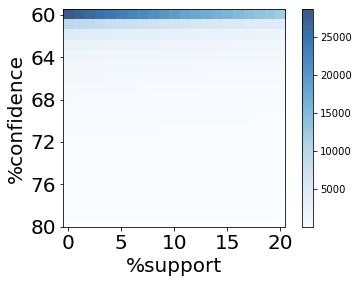

In [63]:
plt.imshow( len_r, cmap='Blues', alpha=0.8 )
plt.xlabel('%support', fontsize=20)
plt.ylabel('%confidence', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks( np.arange(0,20+1,4), np.arange(60,80+1,4), fontsize=20  )
plt.colorbar()

plt.show()

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree # export_graphviz() method

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [69]:
for r in rules:
    if r[0] == 'Neutral':
        rule_to_test = r
        break;
rule_to_test

('Neutral',
 ('Moderately Imageable', 'nor Abs. nor Concr.'),
 928,
 19.820589491670226,
 0.887189292543021,
 1.0407968598562827)

In [126]:
df_class = pd.read_csv("data/data_understanding_output.csv", skipinitialspace=True)
df_train = df_class.drop(['word','PoS', 'length', 'number_of_meanings', 'avg_variance_between_meanings', 'polysemy', 'valence', 'arousal', 'dominance', 'familiarity', 'aoa', 'semsize', 'gender', 'log_freq'], axis=1)
attributes = [col for col in df_train.columns if col != 'sentiment']
X = df_train[attributes].values
y = df_train['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [127]:
X_test[0][0] # concreteness

2.647

In [128]:
X_test[0][1] #imageability

3.086

In [129]:
df_train.head()

,concreteness,imageability,sentiment
0,5.455,4.391,1.0
1,5.906,5.344,1.0
2,3.286,3.177,1.0
3,3.367,2.516,1.0
4,3.292,2.571,1.0


In [132]:
y_pred_test = []
for index, row in enumerate(X_test):
    if row[0] <= 5.5 and row[0] >= 3.606 and row[1] <=5.606  and row[1] >= 3.879:
        y_pred_test.append(1.0)
    else:
        y_pred_test.append(0.0)

In [136]:
len(new_y) - len(y_pred_test)

0

In [135]:
new_y = []
for y in y_test:
    if(y == 1.0):
        new_y.append(1.0)
    else:
        new_y.append(0.0)

In [138]:
print(classification_report(new_y, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.15      0.78      0.25       207
         1.0       0.85      0.22      0.35      1198

    accuracy                           0.30      1405
   macro avg       0.50      0.50      0.30      1405
weighted avg       0.75      0.30      0.33      1405



In [90]:
df_2 = pd.read_csv("data/data_understanding_output.csv", skipinitialspace=True)


df_2['concretenessBin'] = pd.qcut(df_2['concreteness'], 3)
df_2['imageabilityBin'] = pd.qcut(df_2['imageability'], 3)


In [93]:
df_2['imageabilityBin'].unique()

[(3.879, 5.606], (1.7360000000000002, 3.879], (5.606, 6.941]]
Categories (3, interval[float64, right]): [(1.7360000000000002, 3.879] < (3.879, 5.606] < (5.606, 6.941]]